- let's proceed with the examples for CatBoost (CatBoostClassifier and CatBoostRegressor).
- CatBoost is particularly known for its excellent handling of categorical features and robustness.

#### C. CatBoost Examples (CatBoostClassifier & CatBoostRegressor)

**Example 1 (CatBoost Classifier): Breast Cancer Dataset**

In [1]:
pip install catboost

  Using cached catboost-1.2.8-cp313-cp313-win_amd64.whl.metadata (1.5 kB)
Using cached catboost-1.2.8-cp313-cp313-win_amd64.whl (102.4 MB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier # Import CatBoost
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# --- 1. Load Breast Cancer Dataset ---
cancer = load_breast_cancer()
X, y = cancer.data, cancer.target
feature_names = cancer.feature_names
target_names = cancer.target_names

X_df = pd.DataFrame(X, columns=feature_names)
print("Breast Cancer Dataset Loaded for CatBoost Classifier.")
print(f"Features shape: {X_df.shape}, Target shape: {y.shape}")


Breast Cancer Dataset Loaded for CatBoost Classifier.
Features shape: (569, 30), Target shape: (569,)


In [4]:
# --- 2. Split Data ---
X_train, X_test, y_train, y_test = train_test_split(
    X_df, y, test_size=0.3, random_state=42, stratify=y
)
# Note: CatBoost can handle numerical data directly. Scaling is not strictly required
# but can sometimes be beneficial for consistency if comparing with other scaled models.


In [5]:
# --- 3. Instantiate and Train CatBoost Classifier ---
print("\n--- CatBoost Classifier (Breast Cancer Dataset) ---")
# Key CatBoostClassifier parameters:
#   iterations (n_estimators): Number of boosting rounds (trees).
#   learning_rate: Step size shrinkage.
#   depth (max_depth): Depth of the trees.
#   l2_leaf_reg (reg_lambda): L2 regularization coefficient.
#   loss_function: 'Logloss' for binary classification.
#   eval_metric: Metric for evaluation (e.g., 'Accuracy', 'Logloss').
#   verbose: Controls the verbosity of training (0 for silent, higher for more messages).
#   random_seed: For reproducibility.

cb_clf = CatBoostClassifier(
    iterations=100,         # Corresponds to n_estimators
    learning_rate=0.1,
    depth=6,                # Default depth
    loss_function='Logloss',
    eval_metric='Accuracy', # Metric for early stopping or just for logging
    random_seed=42,
    verbose=0               # Set to 0 to make it silent during training
)
# For CatBoost, early stopping is often used with an eval_set
# cb_clf.fit(X_train, y_train, eval_set=(X_test, y_test), early_stopping_rounds=10)
cb_clf.fit(X_train, y_train)



--- CatBoost Classifier (Breast Cancer Dataset) ---



CatBoost Classifier Test Accuracy: 0.9532

Confusion Matrix (CatBoost Classifier):


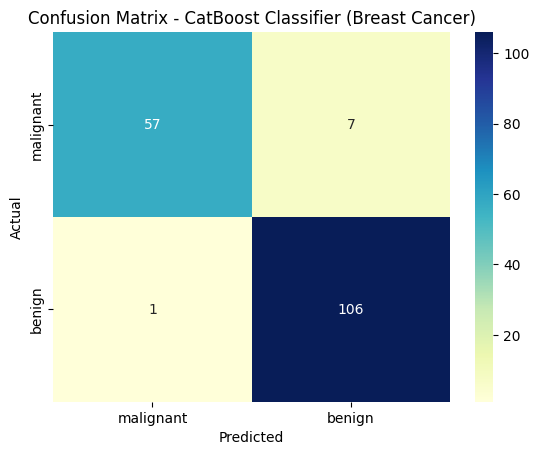


Classification Report (CatBoost Classifier):
              precision    recall  f1-score   support

   malignant       0.98      0.89      0.93        64
      benign       0.94      0.99      0.96       107

    accuracy                           0.95       171
   macro avg       0.96      0.94      0.95       171
weighted avg       0.95      0.95      0.95       171



In [6]:
# --- 4. Make Predictions and Evaluate ---
y_pred_cb_clf = cb_clf.predict(X_test)
y_pred_proba_cb_clf = cb_clf.predict_proba(X_test)[:, 1] # Probability of class 1
accuracy_cb_clf = accuracy_score(y_test, y_pred_cb_clf)

print(f"\nCatBoost Classifier Test Accuracy: {accuracy_cb_clf:.4f}")

print("\nConfusion Matrix (CatBoost Classifier):")
cm_cb_clf = confusion_matrix(y_test, y_pred_cb_clf)
sns.heatmap(cm_cb_clf, annot=True, fmt="d", cmap="YlGnBu", xticklabels=target_names, yticklabels=target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - CatBoost Classifier (Breast Cancer)")
plt.show()

print("\nClassification Report (CatBoost Classifier):")
print(classification_report(y_test, y_pred_cb_clf, target_names=target_names))



Feature Importances from CatBoost Classifier:
                 feature  importance
23            worst area   13.318244
27  worst concave points   12.216088
21         worst texture   10.019602
24      worst smoothness    6.777273
22       worst perimeter    5.987533


C:\Users\king\AppData\Local\Temp\ipykernel_11844\2940473742.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=feature_importance_df_cb.head(10), palette="cubehelix") # Top 10


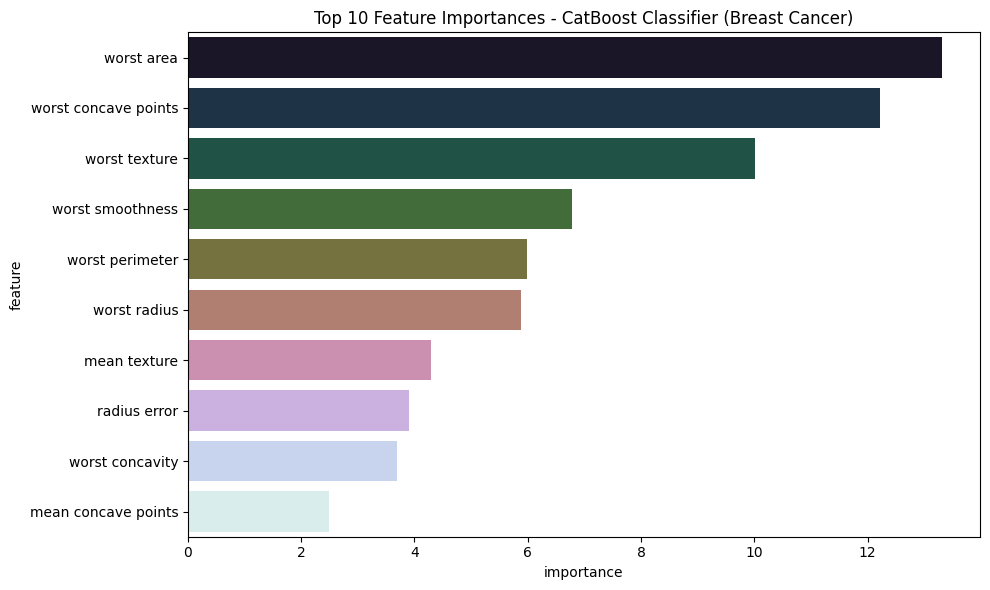

In [7]:
# --- 5. Feature Importances ---
importances_cb = cb_clf.get_feature_importance() # CatBoost specific method
feature_importance_df_cb = pd.DataFrame({
    'feature': feature_names,
    'importance': importances_cb
}).sort_values('importance', ascending=False)

print("\nFeature Importances from CatBoost Classifier:")
print(feature_importance_df_cb.head()) # Print top features

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance_df_cb.head(10), palette="cubehelix") # Top 10
plt.title('Top 10 Feature Importances - CatBoost Classifier (Breast Cancer)')
plt.tight_layout()
plt.show()


---

**Example 2 (CatBoost Regressor): California Housing Dataset**

In [8]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor # Import CatBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# --- 1. Load California Housing Dataset ---
housing = fetch_california_housing()
X, y = housing.data, housing.target
feature_names = housing.feature_names

X_df = pd.DataFrame(X, columns=feature_names)
print("California Housing Dataset Loaded for CatBoost Regressor.")


California Housing Dataset Loaded for CatBoost Regressor.


In [10]:
# --- 2. Split Data ---
X_train, X_test, y_train, y_test = train_test_split(
    X_df, y, test_size=0.3, random_state=42
)

In [11]:
# --- 3. Instantiate and Train CatBoost Regressor ---
print("\n--- CatBoost Regressor (California Housing Dataset) ---")
# Key CatBoostRegressor parameters are similar to CatBoostClassifier,
# but with loss_function typically 'RMSE' or 'MAE'.
cb_reg = CatBoostRegressor(
    iterations=200,         # More iterations might be needed for regression
    learning_rate=0.05,
    depth=7,
    loss_function='RMSE',   # Root Mean Squared Error for regression
    eval_metric='R2',       # R2 as an evaluation metric
    random_seed=42,
    verbose=0               # Silent training
)
# cb_reg.fit(X_train, y_train, eval_set=(X_test, y_test), early_stopping_rounds=20)
cb_reg.fit(X_train, y_train)



--- CatBoost Regressor (California Housing Dataset) ---


In [12]:
# --- 4. Make Predictions and Evaluate ---
y_pred_cb_reg = cb_reg.predict(X_test)
mse_cb_reg = mean_squared_error(y_test, y_pred_cb_reg)
r2_cb_reg = r2_score(y_test, y_pred_cb_reg)

print(f"\nCatBoost Regressor Test MSE: {mse_cb_reg:.4f}")
print(f"CatBoost Regressor Test R2 Score: {r2_cb_reg:.4f}")



CatBoost Regressor Test MSE: 0.2513
CatBoost Regressor Test R2 Score: 0.8086



Feature Importances from CatBoost Regressor:
     feature  importance
0     MedInc   35.416220
6   Latitude   19.869216
7  Longitude   19.352941
5   AveOccup   15.369145
1   HouseAge    5.201312


C:\Users\king\AppData\Local\Temp\ipykernel_11844\3797193743.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=feature_importance_df_cb_reg.head(10), palette="viridis_r")


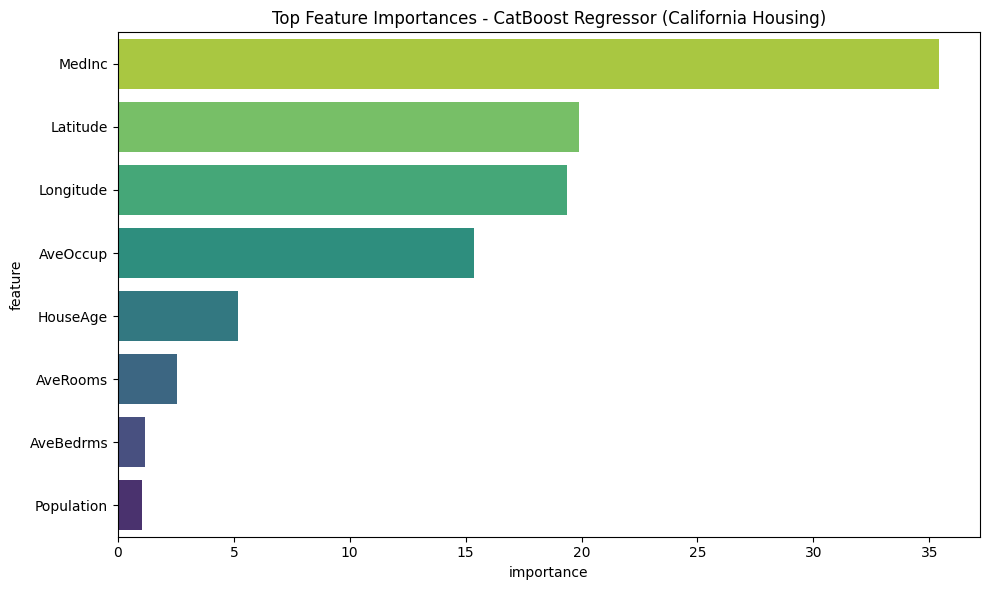

In [13]:
# --- 5. Feature Importances ---
importances_cb_reg = cb_reg.get_feature_importance()
feature_importance_df_cb_reg = pd.DataFrame({
    'feature': feature_names,
    'importance': importances_cb_reg
}).sort_values('importance', ascending=False)

print("\nFeature Importances from CatBoost Regressor:")
print(feature_importance_df_cb_reg.head())

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance_df_cb_reg.head(10), palette="viridis_r")
plt.title('Top Feature Importances - CatBoost Regressor (California Housing)')
plt.tight_layout()
plt.show()

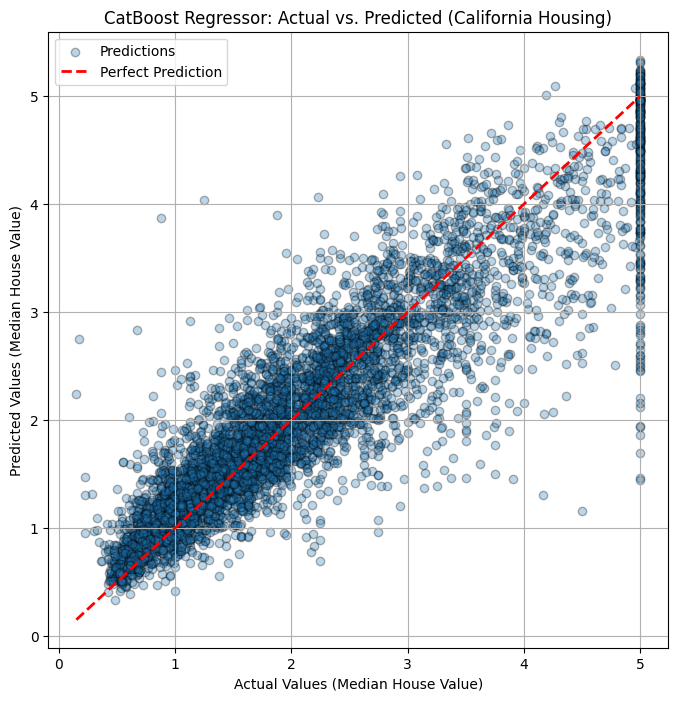

In [14]:
# --- 6. Plot Actual vs. Predicted Values ---
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred_cb_reg, alpha=0.3, edgecolors='k', label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction')
plt.xlabel("Actual Values (Median House Value)")
plt.ylabel("Predicted Values (Median House Value)")
plt.title("CatBoost Regressor: Actual vs. Predicted (California Housing)")
plt.legend()
plt.grid(True)
plt.show()


- These examples showcase the basic usage of CatBoost for classification and regression.
- A key strength of CatBoost is its handling of categorical features, which isn't explicitly demonstrated here since these datasets primarily contain numerical features.
- If you had categorical features, you would pass their column indices or names to the cat_features parameter during model instantiation, and CatBoost would handle their encoding internally using its sophisticated methods.
- The verbose=0 parameter is used to keep the training output clean for these examples; in practice, you might want to see the training progress.
- Using an eval_set with early_stopping_rounds is highly recommended for real projects to find the optimal number of iterations and prevent overfitting.